In [1]:
""" An App to recognise handwritten digits using Tensorflow. MNIST Dataset is used and CNN is trained to 
achieve this task.
    A GUI is created using TKinter which prompts user to draw a number and then we use our model to predict 
that number. """

try:
  %tensorflow_version 2.x
except Exception:
  pass

# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

TensorFlow 2.x selected.
11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(y_train)
print(x_train.shape, y_test.shape)

[5 0 4 ... 5 6 8]
(60000, 28, 28) (10000,)


In [3]:
# Preprocessing

# Adding one more dimension of 1(for Grayscale) to dataset since CNN needs this dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converting to float32 from uint8
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# Normalising
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print("Training Examples:{}".format(x_train.shape[0]), "\nTesting examples:{}".format(x_test.shape[0]))

Training Examples:60000 
Testing examples:10000


In [4]:
# Building and Compiling our model. We use CNN based model because it performs well on grid structured dataset and hence is good for Image
# Classification tasks

input_shape = (28,28,1)
batch_size = 128
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
              tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D((2,2)),

              tf.keras.layers.Dropout(0.25),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256,activation='relu'),

              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(num_classes,activation='softmax')
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adadelta(),
              metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [5]:
# Training the model
# We are using the same dataset for Validation and Testing purposes
history = model.fit(x_train, y_train, batch_size = batch_size,
                    validation_data = (x_test, y_test), epochs = epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 168us/sample - loss: 2.2702 - accuracy: 0.1571 - val_loss: 2.2222 - val_accuracy: 0.4363
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 2.1936 - accuracy: 0.3028 - val_loss: 2.1307 - val_accuracy: 0.6020
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 2.0967 - accuracy: 0.4388 - val_loss: 2.0056 - val_accuracy: 0.6848
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 1.9604 - accuracy: 0.5416 - val_loss: 1.8289 - val_accuracy: 0.7293
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 1.7772 - accuracy: 0.6022 - val_loss: 1.5983 - val_accuracy: 0.7505
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.5587 - accuracy: 0.6391 - val_loss: 1.3417 - val_accuracy: 0.7718
Epoch 7/10
60000/60000 [==============================

Text(0.5, 1.0, 'Loss Comparison')

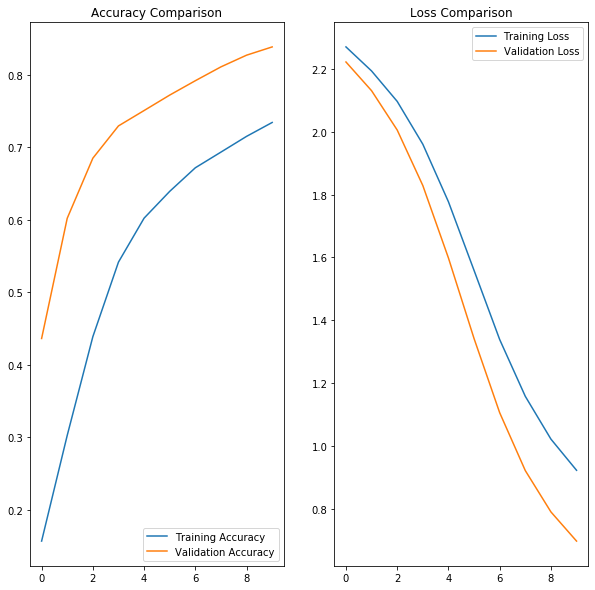

In [6]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy Comparison")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.legend(loc="upper right")
plt.title("Loss Comparison")

In [7]:
# Testing the model
test_score = model.evaluate(x_test, y_test, verbose = 1)
# Saving the model
model.save("HandWritten_Digit_Recognizer.h5")

10000/10000 [==============================] - 1s 77us/sample - loss: 0.6971 - accuracy: 0.8382
